- CartoonGAN 
  - 사전 학습된 모델 이용

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 깃허브 연결

- 경로 : /content/drive/MyDrive/CartoonGAN/사전학습모델 
  - 해당 폴더에 깃허브에서 받는 파일들 저장되어 있어 진행하지 않아도 됨

In [ ]:
# !git clone https://github.com/Yijunmaverick/CartoonGAN-Test-Pytorch-Torch '/content/drive/MyDrive/CartoonGAN/사전학습모델'
# %cd /content/CartoonGAN-Test-Pytorch-Torch

In [5]:
%cd /content/drive/MyDrive/CartoonGAN/사전학습모델

/content/drive/MyDrive/CartoonGAN/사전학습모델


In [6]:
!pip install util.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 모듈

In [7]:
import os
import torch
import torchvision.transforms as transforms
import cv2

# utils.py 이 import되어야 하나 utils 모듈이 import되어 파일 이름 변경 util로 변경 필요함 
from util import plt_imshow   
# /content/drive/MyDrive/CartoonGAN/사전학습모델/network/Transformer.py 
from network.Transformer import Transformer

In [8]:
def make_cartoon(img, size=450, style="Hayao"):
    model = Transformer()
    model.load_state_dict(torch.load(os.path.join('pretrained_model', style + '_net_G_float.pth')))
    model.eval()
    print('{} Model loaded!'.format(style))
    
    T = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(img_size, 2),
    transforms.ToTensor()])
 
    img_input = T(img).unsqueeze(0)
    img_input = -1 + 2 * img_input
    
    img_output = model(img_input)
 
    img_output = (img_output.squeeze().detach().numpy() + 1.) / 2.
    img_output = img_output.transpose([1, 2, 0])
    
    plt_imshow([style], [img_output], figsize=(16, 10))

# 적용

- 3개의 그림 스타일 적용 가능함

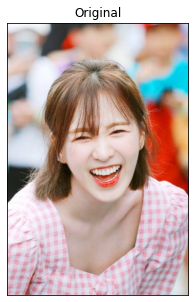

In [ ]:
# 원본 이미지 
img_size = 450
img_path = 'test_img/111.jpg'
img = cv2.imread(img_path)
 
plt_imshow(["Original"], [img])

## 사전 학습 모델 불러오기 

In [ ]:
# !chmod +x /content/CartoonGAN-Test-Pytorch-Torch/pretrained_model/download_t7.sh
%%sh pretrained_model/download_t7.sh

--2023-03-17 04:53:46--  http://vllab1.ucmerced.edu/~yli62/CartoonGAN/torch_t7/Hayao_net_G_float.t7
Resolving vllab1.ucmerced.edu (vllab1.ucmerced.edu)... 169.236.184.68
Connecting to vllab1.ucmerced.edu (vllab1.ucmerced.edu)|169.236.184.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89655489 (86M)
Saving to: ‘Hayao_net_G_float.t7’

     0K .......... .......... .......... .......... ..........  0% 1.04M 83s
    50K .......... .......... .......... .......... ..........  0% 2.15M 61s
   100K .......... .......... .......... .......... ..........  0% 77.1M 41s
   150K .......... .......... .......... .......... ..........  0% 2.28M 40s
   200K .......... .......... .......... .......... ..........  0% 36.9M 33s
   250K .......... .......... .......... .......... ..........  0% 77.5M 27s
   300K .......... .......... .......... .......... ..........  0% 70.8M 24s
   350K .......... .......... .......... .......... ..........  0% 99.8M 21s
   400K .......... .

In [ ]:
%%sh pretrained_model/download_pth.sh

--2023-03-17 04:58:10--  http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Hayao_net_G_float.pth
Resolving vllab1.ucmerced.edu (vllab1.ucmerced.edu)... 169.236.184.68
Connecting to vllab1.ucmerced.edu (vllab1.ucmerced.edu)|169.236.184.68|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2023-03-17 04:58:10--  http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Hosoda_net_G_float.pth
Resolving vllab1.ucmerced.edu (vllab1.ucmerced.edu)... 169.236.184.68
Connecting to vllab1.ucmerced.edu (vllab1.ucmerced.edu)|169.236.184.68|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2023-03-17 04:58:10--  http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Paprika_net_G_float.pth
Resolving vllab1.ucmerced.edu (vllab1.ucmerced.edu)... 169.236.184.68
Connecting to vllab1.ucmerced

Hayao Model loaded!


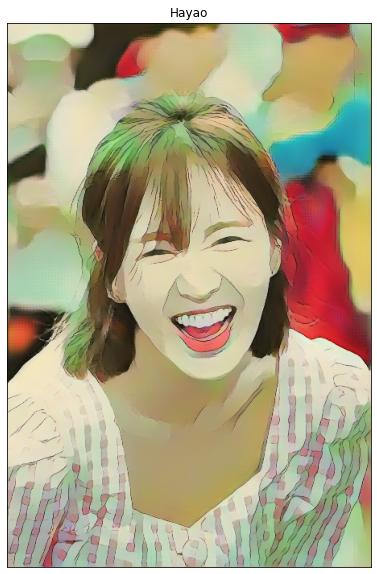

In [ ]:
# Hayao 스타일 
make_cartoon(img, size=450, style="Hayao")

Shinkai Model loaded!


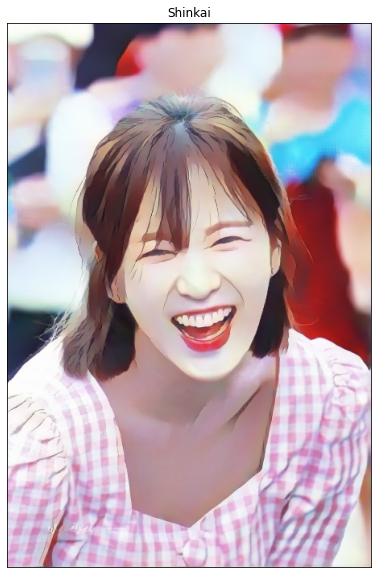

In [ ]:
# Shinkai 스타일 
make_cartoon(img, size=450, style="Shinkai")

Hosoda Model loaded!


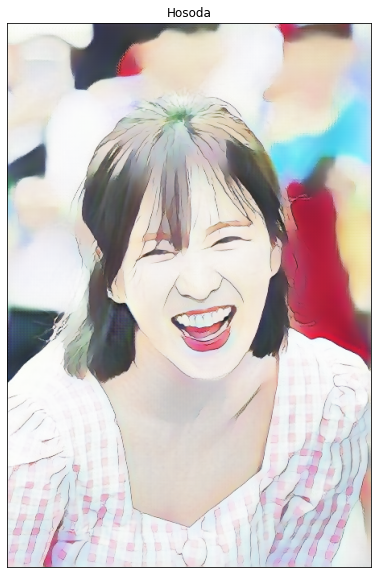

In [ ]:
# Hosoda 스타일
make_cartoon(img, size=450, style="Hosoda")

- 참고 자료 
  - https://yunwoong.tistory.com/117
  - https://github.com/TobiasSunderdiek/cartoon-gan
  - https://github.com/taki0112/CartoonGAN-Tensorflow
